[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,115652.0,118573.0,115649.0,118573.0,118573.0,5162700
2020-01-03,118564.0,118792.0,117341.0,117707.0,117707.0,6834500
2020-01-06,117707.0,117707.0,116269.0,116878.0,116878.0,6570000
2020-01-07,116872.0,117076.0,115965.0,116662.0,116662.0,4854100
2020-01-08,116667.0,117335.0,115693.0,116247.0,116247.0,5910500
...,...,...,...,...,...,...
2020-11-03,93968.0,96250.0,93968.0,95587.0,95587.0,10191800
2020-11-04,95992.0,98296.0,95987.0,97811.0,97811.0,10704600
2020-11-05,97873.0,100922.0,97872.0,100774.0,100774.0,10455300


Retorno de 14.11%


/var/folders/kz/wzxfv03s0lz0x_0wt3ndl1d40000gn/T/ipykernel_57843/1462071826.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  retorno_ibov = cotacao_ibov['Adj Close'][0] / cotacao_ibov['Adj Close'][-1] - 1


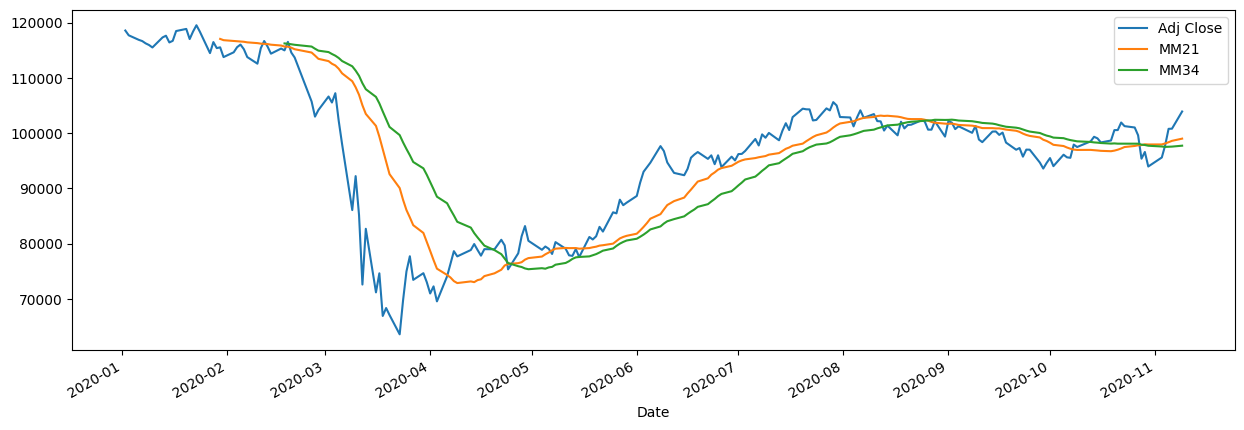

,Ativos,Tipo,Qtde
0,BOVA11,ETF,100
1,SMAL11,ETF,100
2,MGLU3,Ação,1000
3,BBDC4,Ação,100
4,ITUB4,Ação,100
5,ENEV3,Ação,300
6,MOVI3,Ação,100
7,BPAC11,Ação,100
8,GNDl3,Ação,100
9,NTCO3,Ação,100


[*********************100%%**********************]  1 of 1 completed


,BOVA11.SA
Date,
2020-01-02,114.239998
2020-01-03,113.800003
2020-01-06,112.589996
2020-01-07,112.239998
2020-01-08,111.949997
...,...
2020-11-03,92.260002
2020-11-04,94.160004
2020-11-05,96.949997


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['GNDL3.SA']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as web
from IPython.display import display

cotacao_ibov = web.download('^BVSP', start='2020-01-01', end='2020-11-10')

display(cotacao_ibov)
cotacao_ibov['Adj Close'].plot(figsize=(15,5))

retorno_ibov = cotacao_ibov['Adj Close'][0] / cotacao_ibov['Adj Close'][-1] - 1
print(f'Retorno de {retorno_ibov:.2%}')

cotacao_ibov['Adj Close'].rolling(21).mean().plot(label='MM21')
cotacao_ibov['Adj Close'].rolling(34).mean().plot(label='MM34')
plt.legend()
plt.show()

carteira = pd.read_excel('Carteira.xlsx')
display(carteira)

cotacoes_carteira = pd.DataFrame()

extracao = web.download('BOVA11.SA', start='2020-01-01', end='2020-11-10')
cotacoes_carteira['BOVA11.SA'] = extracao ['Adj Close']
display(cotacoes_carteira)

for ativo in carteira['Ativos']:
    extracao = web.download(f'{ativo}.SA', start='2020-01-01', end='2020-11-10')
    cotacoes_carteira[ativo] = extracao['Adj Close']

display(cotacoes_carteira)